# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

## LAB P.H.3: Clustering
Creado por Pablo Casas | https://escueladedatosvivos.ai    

### ¿Qué vimos?
    
- Clasificación, regresión
- Validación

### Objetivo

- Comprender los datos de spotify con AED
- Generar un modelo clásico de k-means
- Comprender el escalado de variables
- Analizar los resultados, `coord_plot`



In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
from funpymodeling.exploratory import status, cat_vars
import numpy as np

### 1) Carga de datos

In [2]:
# Fuente: https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-01-21/readme.md
data=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv")

status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,track_id,0,0.000000,0,0.000000,28356,object
1,track_name,5,0.000152,0,0.000000,23449,object
2,track_artist,5,0.000152,0,0.000000,10692,object
3,track_popularity,0,0.000000,2703,0.082326,101,int64
4,track_album_id,0,0.000000,0,0.000000,22545,object
5,track_album_name,5,0.000152,0,0.000000,19743,object
6,track_album_release_date,0,0.000000,0,0.000000,4530,object
7,playlist_name,0,0.000000,0,0.000000,449,object
8,playlist_id,0,0.000000,0,0.000000,471,object
9,playlist_genre,0,0.000000,0,0.000000,6,object


### 2) AED & Storytelling

array([[<AxesSubplot:title={'center':'track_popularity'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

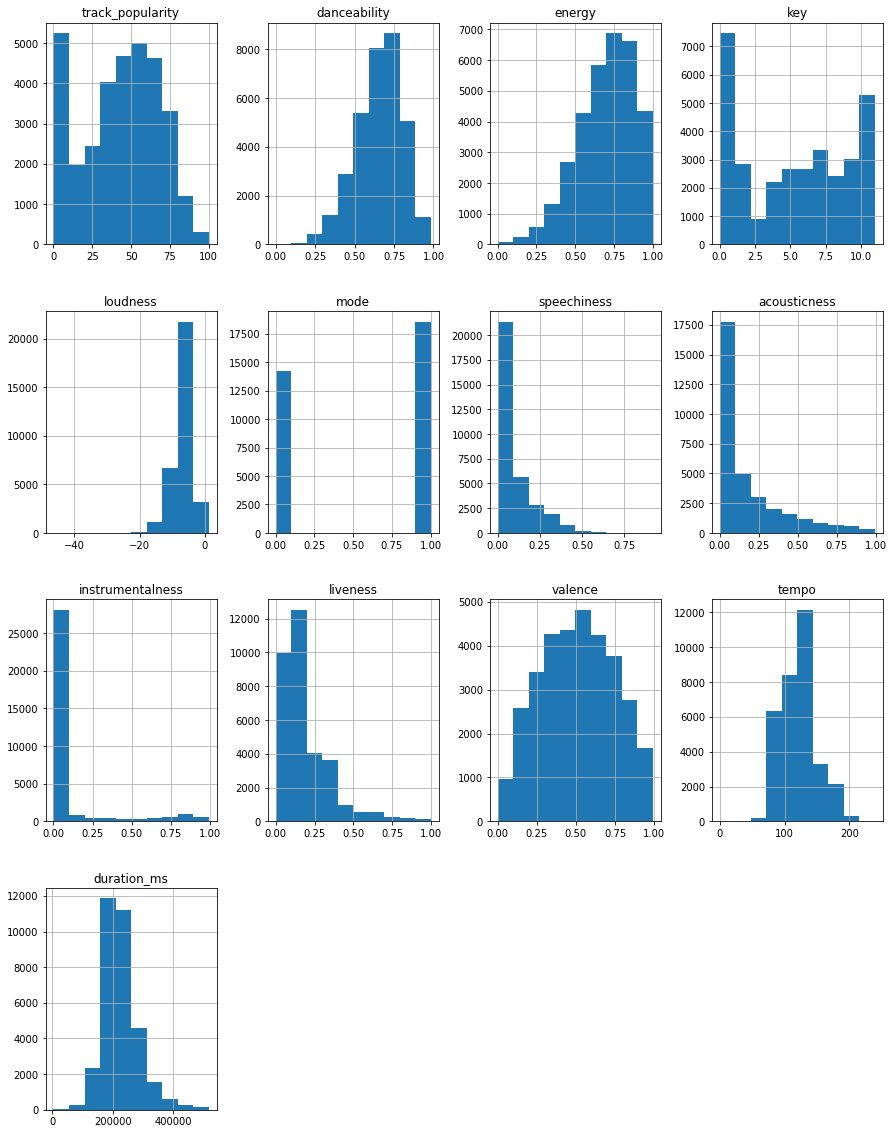

In [3]:
data.hist(figsize = (15,20))

In [4]:
len(data)

32833

In [5]:
ProfileReport(data, minimal=True)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


### 3) Preparación de datos

In [6]:
x_data=data.drop(cat_vars(data), axis=1)

In [7]:
status(x_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,track_popularity,0,0.0,2703,0.082326,101,int64
1,danceability,0,0.0,1,0.000030,822,float64
2,energy,0,0.0,0,0.000000,952,float64
3,key,0,0.0,3454,0.105199,12,int64
4,loudness,0,0.0,0,0.000000,10222,float64
5,mode,0,0.0,14259,0.434289,2,int64
6,speechiness,0,0.0,1,0.000030,1270,float64
7,acousticness,0,0.0,1,0.000030,3731,float64
8,instrumentalness,0,0.0,12089,0.368197,4729,float64
9,liveness,0,0.0,1,0.000030,1624,float64


### 4) Tenemos que normalizar los datos (z-score)

In [8]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(x_data)
x_data_norm=std_scaler.transform(x_data)

# A ver que hizo!?
pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04
mean,-1.406672e-16,1.385031e-16,4.031740e-16,-8.330477e-17,1.449955e-17,-6.248872e-17,-1.182687e-16,4.371505e-17,-7.871956e-17,1.231650e-16,1.579801e-16,1.688007e-17,1.776736e-16
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.700192e+00,-4.513616e+00,-3.860786e+00,-1.488113e+00,-1.329428e+01,-1.141322e+00,-1.056809e+00,-7.983170e-01,-3.779530e-01,-1.232390e+00,-2.189910e+00,-4.493185e+00,-3.706975e+00
25%,-7.395656e-01,-6.330821e-01,-6.501633e-01,-9.343417e-01,-4.857132e-01,-1.141322e+00,-6.521210e-01,-7.295647e-01,-3.779530e-01,-6.316705e-01,-7.701772e-01,-7.776443e-01,-6.347793e-01
50%,1.009826e-01,1.182114e-01,1.237138e-01,1.731999e-01,1.852164e-01,8.761769e-01,-4.399065e-01,-4.322454e-01,-3.778812e-01,-4.093978e-01,6.172306e-03,4.099393e-02,-1.637858e-01
75%,7.814264e-01,7.316529e-01,7.815093e-01,1.003856e+00,6.941860e-01,8.761769e-01,2.460892e-01,3.627309e-01,-3.564123e-01,3.747130e-01,7.825218e-01,4.845840e-01,4.643783e-01
max,2.302418e+00,2.261810e+00,1.665940e+00,1.557627e+00,2.675185e+00,8.761769e-01,8.004256e+00,3.727493e+00,4.055060e+00,5.221943e+00,2.060710e+00,4.406866e+00,4.880413e+00


### 5) Creación del modelo

In [9]:
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters=3,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

KMeans(max_iter=100, n_clusters=3, n_init='auto', random_state=0)

In [10]:
pred_cl = cl_model.predict(x_data_norm)

#  Número de cluster: 
pred_cl

array([1, 1, 1, ..., 2, 2, 2])

### 6) Pequeño paréntesis... ¿Cantidad de clusters?

In [11]:
cl_model

KMeans(max_iter=100, n_clusters=3, n_init='auto', random_state=0)

In [12]:
from copy import deepcopy

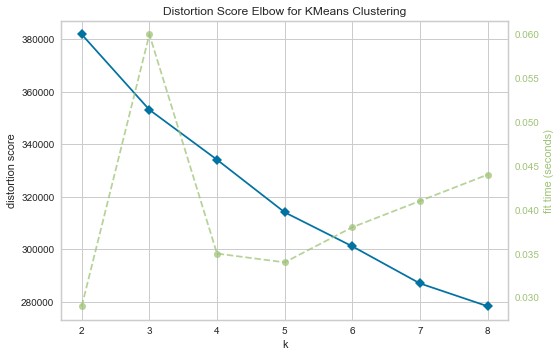

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_init='auto', random_state=0),
                 k=(2, 9), locate_elbow=False)

In [13]:
from yellowbrick.cluster.elbow import kelbow_visualizer

cl_model2=deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, x_data_norm, k=(2,9), locate_elbow=False)

Copy-paste de la [doc](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html): _distortion, which computes the sum of squared distances from each point to its assigned center._

### 7) Analizando el modelo final: Gráfico de coordenadas

Hacemos copia de los datos y le agregamos el cluster:

In [14]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=x_data.copy() # hagan copia de los datos de TR para no perderlos
x_data_cl[cluster_var]=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados

In [15]:
x_data_cl.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,1
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,1
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,1
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,1


In [16]:
from funpymodeling.model_validation import coord_plot

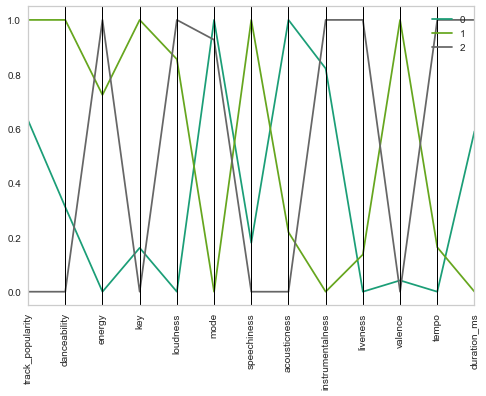

In [17]:
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

In [18]:
d_orig

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,43.116497,0.616163,0.446230,5.247125,-10.411132,0.601545,0.090320,0.465101,0.126792,0.156994,0.402960,113.497578,228567.228064,0
1,48.406859,0.739983,0.712917,5.563588,-6.183148,0.529034,0.132937,0.147218,0.019962,0.168072,0.640003,116.354338,216479.554560,1
2,34.091358,0.560120,0.814549,5.186239,-5.467661,0.596247,0.080960,0.058106,0.150076,0.237948,0.392683,130.979873,236957.611047,2


In [19]:
d_transf

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.630445,0.311586,0.000000,0.161351,0.000000,1.000000,0.18009,1.000000,0.821051,0.000000,0.041554,0.000000,0.590274,0
1,1.000000,1.000000,0.724064,1.000000,0.855266,0.000000,1.00000,0.218952,0.000000,0.136835,1.000000,0.163409,0.000000,1
2,0.000000,0.000000,1.000000,0.000000,1.000000,0.926942,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2


### Bonus track! Scatter 3D!

In [20]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,track_id,0,0.000000,0,0.000000,28356,object
1,track_name,5,0.000152,0,0.000000,23449,object
2,track_artist,5,0.000152,0,0.000000,10692,object
3,track_popularity,0,0.000000,2703,0.082326,101,int64
4,track_album_id,0,0.000000,0,0.000000,22545,object
5,track_album_name,5,0.000152,0,0.000000,19743,object
6,track_album_release_date,0,0.000000,0,0.000000,4530,object
7,playlist_name,0,0.000000,0,0.000000,449,object
8,playlist_id,0,0.000000,0,0.000000,471,object
9,playlist_genre,0,0.000000,0,0.000000,6,object


In [21]:
# Selección de vars
d2=data[['playlist_genre', 'speechiness','instrumentalness','loudness', 'track_name']]

# Tomamos muestra para que no nos explote el gráfico ;)
d2=d2.sample(n=300)

In [22]:
#!pip3 install plotly

In [23]:
# Usamos la maravilla de plotly
import plotly.express as px

fig = px.scatter_3d(d2, x='speechiness', y='instrumentalness', z='loudness', color='playlist_genre')
fig.show()

**Nota** 
<br>Si no aparece el gráfico -> Instalar en la consola la extension:

`jupyter labextension install jupyterlab-plotly`

Luego reiniciar jupyer lab.

---

## Resumen!

- Modelo de clustering k-means (k=3)
- Gráfico del codo (elbow)
- Creamos datos para el visualizador
- Exploramos el modelo con `coord_plot` de `funpymodeling` <3



--- 

## Ejercicios!

1) Traten de encontrar un modelo de muchos clusters, y dentro de este modelo, busquen aquel o aquellos pocos clusters que tienen un comportamiento "extraño" / atípico.

    Son los clusters que tienen pocos casos.

    Prueben con k=10 y k=20.

    Este enfoque es usado a veces en anomaly detection o detección de comportamientos atípicos para aprovechar para una campaña comercial.

2) Escribir un pequeño párrafo que descrriba las principales caratecterísticas de este segmento.